# *How to use this Colab notebook?*
# **Just follow the text prompts and run the individual cells!**

## **To run a cell, press the button appearing on the top left corner of each cell, when the mouse hovers over it.**
## *Alternatively press **Shift + Enter** on the keyboard after selecting the cell with the mouse.*

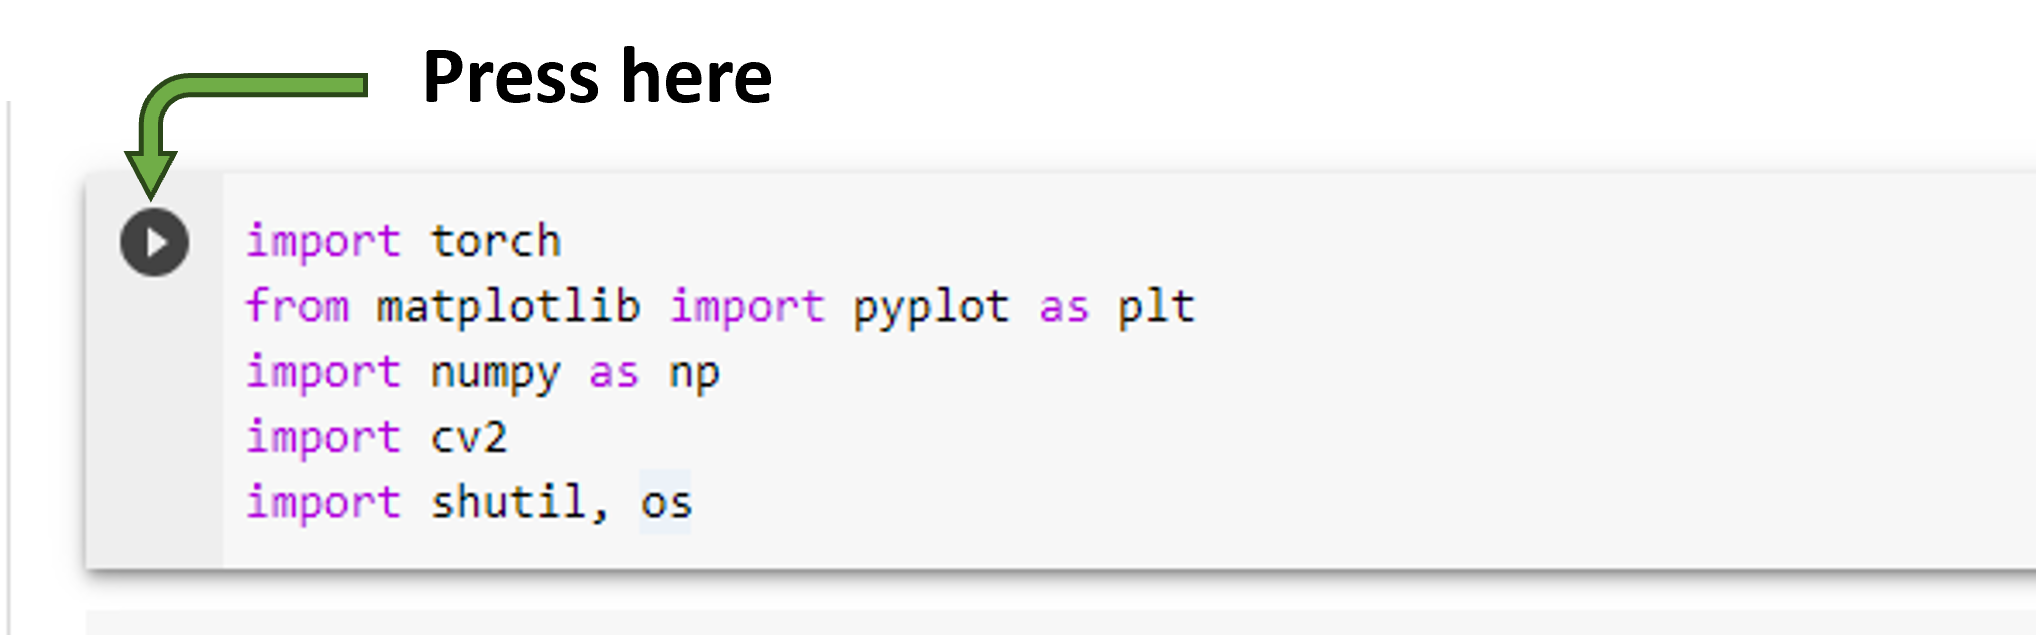

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import shutil, os

In [2]:
!pip install torch torchvision torchaudio &> /dev/null

In [3]:
!git clone https://github.com/ultralytics/yolov5 &> /dev/null

In [4]:
%cd yolov5
!pip install -r requirements.txt &> /dev/null
%cd ..

/content/yolov5
/content


# **Loading a custom model**

In [5]:
!gdown --fuzzy "https://drive.google.com/file/d/1opNJhGAiW77X8F9W3lEltCi1qpzPltxI/view?usp=sharing"


Downloading...
From: https://drive.google.com/uc?id=1opNJhGAiW77X8F9W3lEltCi1qpzPltxI
To: /content/last.pt
100% 173M/173M [00:03<00:00, 53.5MB/s]


In [6]:
path = '/content/last.pt' # "/content/drive/MyDrive/Models/Outputs/YOLO/yolov5x_1_500epochs/exp/weights/last.pt"

model = torch.hub.load('ultralytics/yolov5', 'custom', path=path, force_reload=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-10-28 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 322 layers, 86281078 parameters, 0 gradients, 204.1 GFLOPs
Adding AutoShape... 


# **Load images**

In [7]:
# !gdown --fuzzy "https://drive.google.com/file/d/1BtgNHzUSnII2838L3ifk9DTiCTsXc-u5/view?usp=sharing" -O "dataset.zip"
!gdown --fuzzy 'https://drive.google.com/file/d/1hhYzmcP5rYMbyB7Qj1DiuwoFlORIdbTJ/view?usp=sharing' -O "dataset.zip"

# Unzip the dataset
!unzip /content/dataset.zip &> /dev/null

Downloading...
From: https://drive.google.com/uc?id=1hhYzmcP5rYMbyB7Qj1DiuwoFlORIdbTJ
To: /content/dataset.zip
100% 456M/456M [00:13<00:00, 34.5MB/s]


# **Make predictions on built-in images and view the results**

In [8]:
dir_pth = '/content/data/valid/images'
images = iter(os.listdir(dir_pth))

### *Repeatedly rerun the next cell to get predictions on different images.*
### *You can use **Ctrl + Enter** to do this faster.*

This is a common_musk_turtle_42.jpeg


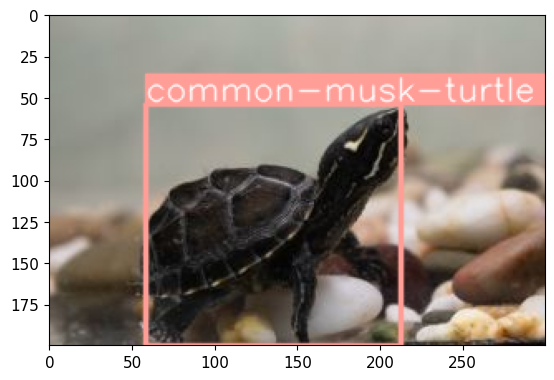

-------------------
<bound method Detections.print of YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 200x300 1 common-musk-turtle
Speed: 5.6ms pre-process, 3460.7ms inference, 1.4ms NMS per image at shape (1, 3, 448, 640)>
-------------------
-------------------
tensor([[0.19486, 0.27139, 0.70951, 1.00000, 0.91721, 1.00000]])
common-musk-turtle 91


In [58]:
next_img = next(images)
img = os.path.join(dir_pth, next_img)

print("This is a", next_img)
results = model(img)

%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

print("-------------------")
names = ['alligator-snapping-turtle', 'common-musk-turtle', 'cumberland-slider-terrapin','european-pond-turtle','false-map-turtle','florida-red-bellied-cooter','map-turtle','mississippi-map-turtle','mud-turtle','peninsula-cooter','razorback-musk-turtle','red-eared-slider-terrapin','river-cooter','snake-necked-turtle','softshell-turtle','spotted-turtle', 'yellow-bellied-slider-terrapin']
print(results.print)
print("-------------------")
# print(results.xyxyn)
print("-------------------")
preds = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()
preds = results.xyxyn
print(preds[0][:])
if preds:
  for pred in preds[0][:]:
    print(names[int(pred[-1])], int(pred[-2]*100))
# print(cord_thres)

# **You can also upload your own image of a terrapin and get a prediction on it!**

In [ ]:
# A user friendly (button) way of uploading a sample image.

from google.colab import files
uploaded = files.upload()
print(uploaded.keys())

dict_keys([])


In [ ]:
names= iter(uploaded.keys())

Peninsula cooter.JPG


image 1/1: 1446x1928 1 cumberland-slider-terrapin
Speed: 54.1ms pre-process, 2627.3ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)


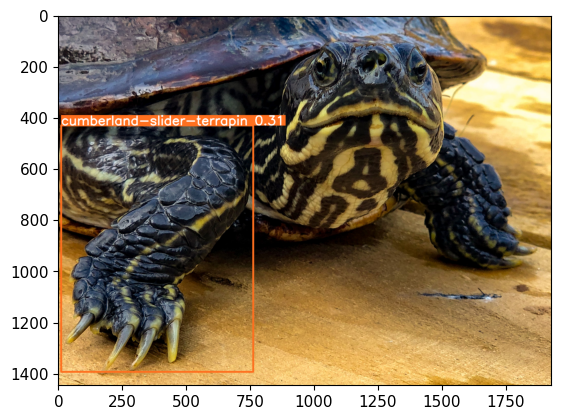

In [ ]:
img = next(names)

print(img)
results = model(img)
results.print()

%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()